## Contaminación ambiental 
En 2021, las emisiones de CO2 en Canadá han crecido 15,083 megatoneladas, un 2,75% respecto a 2020.
Las emisiones de CO2 en 2021 han sido de 563,538 megatoneladas, con lo que Canadá está entre los diez países más contaminantes en lo que respecta a emisiones de dióxido de carbono del ranking de países formado por 184 países.

El ministro canadiense del Medioambiente, Steven Guilbeault, presentó este martes el plan del Gobierno para reducir drásticamente las emisiones de gases de efecto invernadero en los próximos ocho años y alcanzar los ambiciosos objetivos de reducción establecidos para el 2030. Se trata de un plan que demandará grandes recortes en los sectores de la electricidad, el petróleo, el gas y el transporte.

Para este reporte, se busca saber y entender cuáles son los principales componentes causantes de este problema en los vehículos, saber cuáles son los vehículos que más y menos contaminan. Para lo cuál, responderemos a las preguntas ¿cuáles son los componentes que tienen mayor impacto en el aumento de las emisiones de dióxido de carbono en un vehículo?, y ¿Qué impacto en el medio ambiente tiene un vehículo eléctrico?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Understanding
De acuerdo a una guía de Canadá "Fuel Consumtion Guide", el tipo de gasolina se separa en las siguientes categorías:
- X = Regular gasoline 
- Z = Premium gasoline
- D = Diesel
- E = E85
- B = Electricity
- N = Natural gas

Por otro lado, la eficiencia del combustible se refiere más comúnmente a la eficiencia energética de un modelo concreto de vehículo, en el que su rendimiento total se da como una relación de unidades de autonomía por una cantidad unitaria de combustible de entrada (gasolina, gasóleo, etc.). Esta relación se expresa en medidas comunes como "litros por 100 kilómetros" (L/100 km). Dependiendo cuál sea su eficiencia, tendrá un gasto de mpg.

Por último, hablando de las emisiones CO2, las ordenes de magnitud son las siguientes: un coche potente o pesado emite más de 250 g de CO2/km, los compactos entre 110 y 180 g de CO2/km y los más pequeños pueden alcanzar los 90 g de CO2/km. 

In [4]:
# Lo primero que se hará es checar los datos faltaes en el dataset
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

En este caso, no hay datos faltantes, por lo que se puede continuar con el análisis.
Por lo que ahora se observara la distribución de los datos con gráficos de histogramas

C:\Users\olive\AppData\Local\Temp/ipykernel_21984/894870606.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

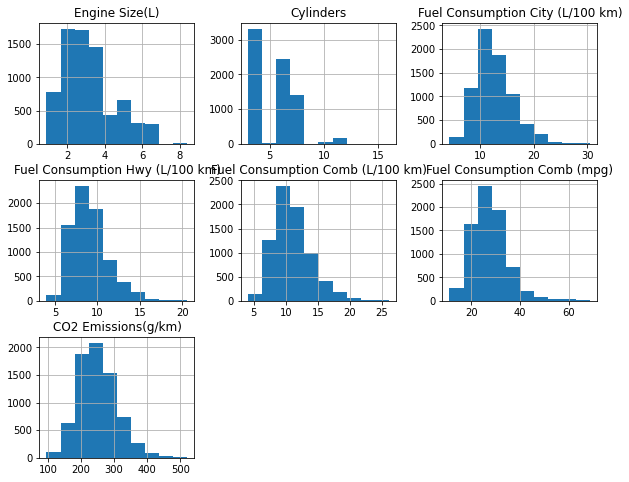

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
df.hist(ax=ax)
plt.show

Podemos ver que todas las métricas tienen buena distribución de los datos, por lo que no tenemos la necesidad de quitar alguno.

Checamos el tamaño del dataset

In [6]:
df.shape

(7385, 12)

Revisamos las variables categóricas

In [7]:
df['Make'].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

In [8]:
df['Model'].value_counts()

F-150 FFV                     32
F-150 FFV 4X4                 32
MUSTANG                       27
FOCUS FFV                     24
SONIC                         20
                              ..
F-PACE SVR                     1
1500 Classic 4X4 EcoDiesel     1
M8 Coupe Competition           1
LS 500h                        1
V60 3.0T AWD                   1
Name: Model, Length: 2053, dtype: int64

<Axes: >

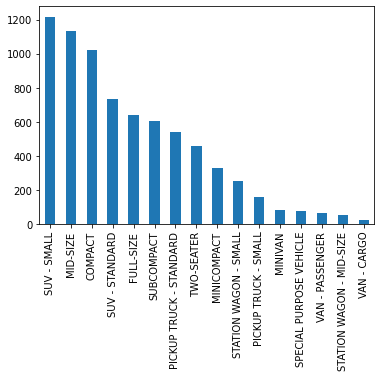

In [9]:
df['Vehicle Class'].value_counts().plot(kind='bar')

<Axes: >

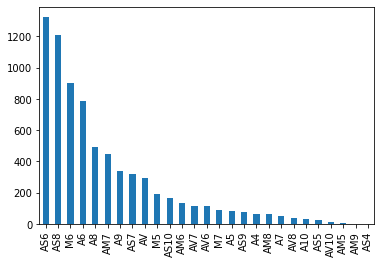

In [10]:
df['Transmission'].value_counts().plot(kind='bar')

<Axes: >

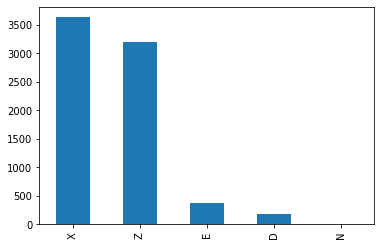

In [11]:
df['Fuel Type'].value_counts().plot(kind='bar')

Vemos que en la base de datos tenemos diferentes tipos de marcas de vehículos, por cada marca contamos con su respectivo modelo y el tipo de vehículo que es (ya sea compato, grande, etc.). También contamos con la transmisión de cada uno y finalmente su tipo de gasolina que ocupan, las cuales ya sabemos a qué se refieren por la investigación que se hizo anteriormente. 

Ahora que sabemos más de nuestros datos, los separaremos en datos numéricos y categóricos, además de definir nuestra variable a predecir.

Para responder a la pregunta ¿cuáles son los componentes que tienen mayor impacto en el aumento de las emisiones de dióxido de carbono en un vehículo?, haremos una predicción de las emisiones CO2 de cada tipo de vehículo. Para ello, haremos una preparación de los datos y haremos el modelo. 

In [12]:
target = 'CO2 Emissions(g/km)'

categ_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64', 'uint8','int8']]

In [13]:
#mapa de correlación de las variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


Como era de esperarse, podemos ver que todas las variables se correlacionan entre sí. Esto debido a que cada uno de estas métricas tienen un alto impacto en las emisiones de CO2. Como vemos que todas están altamente relacionadas al CO2, pero ninguna está por encima del 0.95, no se eliminará ninguna variable.

Checar las medidas de distribución central

In [14]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Podemos ver cómo el tamaño del motor tiene sólo 1 cuarto arriba de 3.7 litros. Algo curioso es que el motor más chico apenas es de 0.9 litros, lo cuál hace pensar que es de un coche pequeño. Los cilindors se concentran entre 3 y 6, pero de igual manera hay 1 cuarto de los datos por enciama de estos datos. Esto podría ser debido a que el 25% de los coches son más grandes y estos necesitan un mayor motor y más cilindros, por lo tanto estos emiten más CO2, como podemos ver hasta el final, que el máximo de emisiones es de 522.

Por último para ver la distribución de datos hacemos un sactter plot

c:\users\olive\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

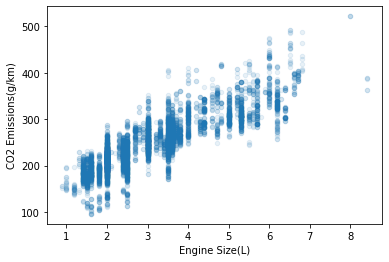

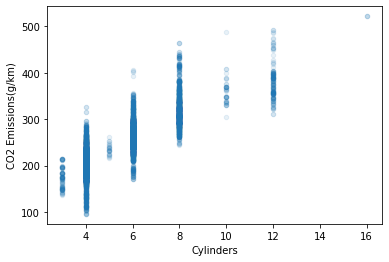

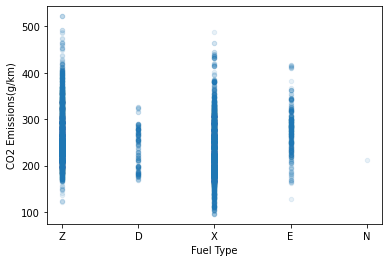

In [15]:
df.plot(kind="scatter", x="Engine Size(L)", y="CO2 Emissions(g/km)", alpha=0.1)
df.plot(kind="scatter", x="Cylinders", y="CO2 Emissions(g/km)", alpha=0.1)
df.plot(kind="scatter", x="Fuel Type", y="CO2 Emissions(g/km)", alpha=0.1)

## Data Preparation

La distribución del tamaño de motor y los cilindro es tal cuál se esperaba, mientras mayor, más contamina.
Mientras que del tipo de gasolina sale un gráfico diferente a como lo esperaba, pues en específico los tipos Z y X tienen una distribución muy grande de contaminación CO2. 

Se separa el target de las X y ese mismo target se convierte en nuestra Y a predecir

In [16]:
X = df.drop(target,axis=1)
Y = df[target]

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0) 

Siguiendo con la preparación de los datos, como es importante saber las especificaciones del auto para conocer cuál contamina más, se hará un label enconder en las variables categóricas

In [19]:
categ_cols

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [20]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
X_train['Make']=label_encoder.fit_transform(X_train['Make']) 
X_test['Make']=label_encoder.fit_transform(X_test['Make']) 

X_train['Model'] =label_encoder.fit_transform(X_train['Model'])
X_test['Model'] =label_encoder.fit_transform(X_test['Model']) 

X_train['Vehicle Class'] =label_encoder.fit_transform(X_train['Vehicle Class']) 
X_test['Vehicle Class'] =label_encoder.fit_transform(X_test['Vehicle Class']) 

X_train['Transmission'] =label_encoder.fit_transform(X_train['Transmission']) 
X_test['Transmission'] =label_encoder.fit_transform(X_test['Transmission']) 

X_train['Fuel Type'] =label_encoder.fit_transform(X_train['Fuel Type']) 
X_test['Fuel Type'] =label_encoder.fit_transform(X_test['Fuel Type']) 

X_train.head()

C:\Users\olive\AppData\Local\Temp/ipykernel_21984/442619102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Make']=label_encoder.fit_transform(X_train['Make'])
C:\Users\olive\AppData\Local\Temp/ipykernel_21984/442619102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Make']=label_encoder.fit_transform(X_test['Make'])
C:\Users\olive\AppData\Local\Temp/ipykernel_21984/442619102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
743,28,646,2,2.1,4,15,0,8.5,5.7,7.2,39
7027,20,1714,11,3.6,6,5,3,12.8,10.4,11.8,24
5879,15,1832,12,5.3,8,3,3,16.8,11.3,14.3,20
4974,20,890,12,6.4,8,5,4,18.3,12.6,15.7,18
546,18,1301,12,5.6,8,15,4,17.4,12.1,15.0,19


Convertimos los datos categóricos a numéricos usando label enconder, y podemos ver que ya todas las varibales tanto de X train y X test son valores numéricos.

In [21]:
X_train.shape

(5169, 11)

Podemos ver que efectivamente, tenemos tan solo el 70% de los datos iniciales, con los cuáles se entrenará el modelo. Además podemos ver que sólo tenemos 11 columnas, y no 12 ya que no está la variable a predecir.

Por último, verificamos que estas nuevas variables numéricas estén correlacionadas

In [22]:
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
Make,1.000000,0.028734,-0.019778,-0.134738,-0.151820,0.173979,0.052984,-0.184030,-0.110073,-0.160799,0.168652
Model,0.028734,1.000000,0.191411,0.068896,0.044436,-0.011602,-0.079606,0.096731,0.154667,0.117815,-0.091072
Vehicle Class,-0.019778,0.191411,1.000000,0.144973,0.106871,-0.140778,-0.022669,0.240675,0.330815,0.274470,-0.276553
Engine Size(L),-0.134738,0.068896,0.144973,1.000000,0.927595,-0.321782,0.069707,0.830812,0.758613,0.815765,-0.758445
Cylinders,-0.151820,0.044436,0.106871,0.927595,1.000000,-0.270372,0.136557,0.801906,0.714381,0.781128,-0.721352
Transmission,0.173979,-0.011602,-0.140778,-0.321782,-0.270372,1.000000,0.208128,-0.343103,-0.348935,-0.349729,0.330515
Fuel Type,0.052984,-0.079606,-0.022669,0.069707,0.136557,0.208128,1.000000,-0.062591,-0.119054,-0.083180,-0.030721
Fuel Consumption City (L/100 km),-0.184030,0.096731,0.240675,0.830812,0.801906,-0.343103,-0.062591,1.000000,0.947920,0.993823,-0.926982
Fuel Consumption Hwy (L/100 km),-0.110073,0.154667,0.330815,0.758613,0.714381,-0.348935,-0.119054,0.947920,1.000000,0.977127,-0.890472
Fuel Consumption Comb (L/100 km),-0.160799,0.117815,0.274470,0.815765,0.781128,-0.349729,-0.083180,0.993823,0.977127,1.000000,-0.925523


De las 5 variables categóricas convertidas a numéricas, 3 de ellas tienen una buena correlación con los demás datos. 
La marca del vehículo, el tipo de coche y la transmición están correlacionadas con las 3 variables de Fuel Consumption, esto nos servirá para hacer el modelo aún mejor. 
Pero las métricas de tipo de vehículo y tipo de gasolina no aportan mucha información. Estas las quitaré ya que, como no tienen una alta correlación con ninguno de los demás datos, serán más un estorbo que una ayuda. Porbaremos el modelo sin estas variables y procederemos a hacer una análisis

In [23]:
X_train.drop(['Vehicle Class','Fuel Type'],axis=1,inplace=True)
X_test.drop(['Vehicle Class','Fuel Type'],axis=1,inplace=True)

c:\users\olive\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


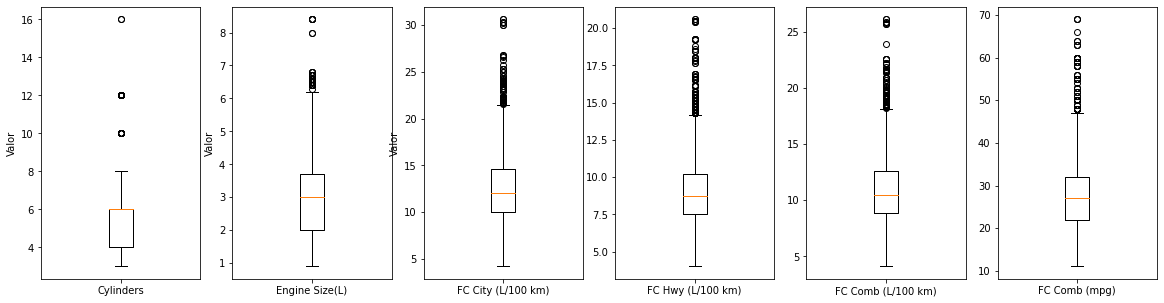

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6)
fig.set_size_inches(20, 5)
ax[0].boxplot(X_train['Cylinders'])
ax[0].set_xticklabels(['Cylinders'])
ax[0].set_ylabel('Valor')
ax[1].boxplot(X_train['Engine Size(L)'])
ax[1].set_xticklabels(['Engine Size(L)'])
ax[1].set_ylabel('Valor')
ax[2].boxplot(X_train['Fuel Consumption City (L/100 km)'])
ax[2].set_xticklabels(['FC City (L/100 km)'])
ax[3].boxplot(X_train['Fuel Consumption Hwy (L/100 km)'])
ax[3].set_xticklabels(['FC Hwy (L/100 km)'])
ax[4].boxplot(X_train['Fuel Consumption Comb (L/100 km)'])
ax[4].set_xticklabels(['FC Comb (L/100 km)'])
ax[5].boxplot(X_train['Fuel Consumption Comb (mpg)'])
ax[5].set_xticklabels(['FC Comb (mpg)'])

ax[2].set_ylabel('Valor')
plt.show()

Podemos ver la distribución de las variables numéricas, vemos que en general en todas las variables el boxplot se parece mucho, tiene una buena dispersión de datos entre el primer y tercer cuartil, y desupués el cuarto cuartuil incrementa su valor y hay una gran cantidad de outliers.
Con esta información, podemos hacer una suposición de que los vehículos con datos después del 3 cuartil y los outliers son los principales causantes de la contaminación de CO2.

### Hacemos una regresión lineal múltiple con sklearn

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

In [28]:
print('Observaciones para el training:',X_train.shape[0],'Observaciones para el test:',X_test.shape[0])

Observaciones para el training: 5169 Observaciones para el test: 2216


In [29]:
model = LinearRegression()  
model.fit(X_train,y_train)  

LinearRegression()

In [30]:
predictions = model.predict(X_test)

print('Puntaje entrenamiento: {}'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))
print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.9085972161613586
Puntaje Test: 0.8942128573957069

MAE 11.86192785515848
MSE 359.2115018728868


Basado en los resultados, puedo decir que mi modelo es bueno. El puntaje de entrenamiento es de 0.91 y el puntaje de prueba es de 0.89, lo que indica que el modelo tiene una buena capacidad de generalización, es decir, puede predecir los valores de nuevas muestras, no hay overfitting y esto es un punto muy positivo.
Además, el MAE es de 11.86 y el MSE es de 359.21, lo que significa que el modelo tiene un bajo error promedio en la predicción de los valores y las diferencias entre las predicciones y los valores del data set son pequeñas.
Por lo tanto, el modelo de regresión lineal es efectivo para predecir los valores de CO2 emitido por los vehículos.

In [31]:
#test de kurtosis del modelo
from scipy.stats import kurtosis
kurtosis(y_test)

0.7010861270963571

In [32]:
#test de jarque bera del modelo
from scipy.stats import jarque_bera 
jarque_bera(y_test)

Jarque_beraResult(statistic=157.67472036909226, pvalue=0.0)

Como la Kurtosis es muy cercana a 0, y el pvalue de la prueba Jaque Bera es 0, puedo decir que el modelo tiene una distribución normal, por lo tanto es un buen modelo y ya no habría que hacer nada para corregirlo

Puedo decir entoces que el modelo es bueno, capaz de predecir valores fuera de la base de datos (poco overfitting) y con una distribución de los datos normal.
Por último se comparará este modelo con otros, como el kNN o el random forest

### Modelo Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,max_leaf_nodes=50,random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Puntaje entrenamiento: {}'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))
print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.986109383419147
Puntaje Test: 0.9664580279128058

MAE 4.933450587327322
MSE 113.89533616848564


El modelo random forest acabó siendo mejor que la regresión lineal, tiene unos puntajes muy altos, muy cercano a 1 y no hay overfitting. En mi consideración es el mejor modelo.